In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from glob import glob

import warnings
warnings.filterwarnings('ignore')


In [2]:
data_dir_train = pathlib.Path(r"C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
## Create a dataset
## Define some parameters for the loader:

batch_size = 32
img_height = 180
img_width = 180

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset ='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset ='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


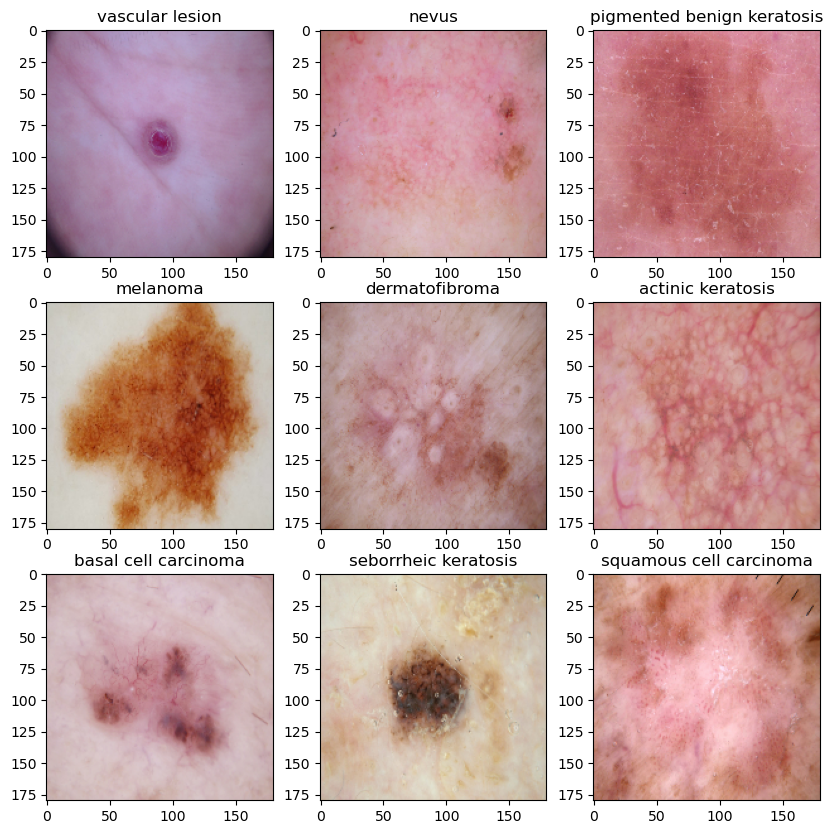

In [9]:
##Visualise the data 
### your code goes here, you can use training or validation data to visualize

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(3,3,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
  else:
    break

In [10]:
# Demo Cell

dataset = tf.data.Dataset.range(5)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.map(lambda x: x**2)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.cache()
# The first time reading through the data will generate the data using
# `range` and `map`.
print(list(dataset.as_numpy_iterator()))

# Subsequent iterations read from the cache.
print(list(dataset.as_numpy_iterator()))


[0, 1, 2, 3, 4]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]


In [11]:
dataset = tf.data.Dataset.range(3)
print(list(dataset.as_numpy_iterator()))
dataset = dataset.prefetch(2)
print(list(dataset.as_numpy_iterator()))

[0, 1, 2]
[0, 1, 2]


In [12]:
# https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune

# https://medium.com/analytics-vidhya/tensorflow-2-0-tf-data-api-eaa9889186cc

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
### Your code goes here
num_classes = 9

# https://keras.io/api/layers/preprocessing_layers/image_preprocessing/rescaling/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 102s 2s/step - loss: 2.9830 - accuracy: 0.1842 - val_loss: 2.1147 - val_accuracy: 0.2349
Epoch 2/20
56/56 [==============================] - 90s 2s/step - loss: 1.9191 - accuracy: 0.2879 - val_loss: 1.8856 - val_accuracy: 0.2975
Epoch 3/20
56/56 [==============================] - 82s 1s/step - loss: 1.7478 - accuracy: 0.3845 - val_loss: 1.8197 - val_accuracy: 0.3400
Epoch 4/20
56/56 [==============================] - 80s 1s/step - loss: 1.5737 - accuracy: 0.4492 - val_loss: 1.5635 - val_accuracy: 0.4206
Epoch 5/20
56/56 [==============================] - 90s 2s/step - loss: 1.3850 - accuracy: 0.5162 - val_loss: 1.5092 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 83s 1s/step - loss: 1.2611 - accuracy: 0.5670 - val_loss: 1.4525 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 85s 2s/step - loss: 1.2182 - accuracy: 0.5737 - val_loss: 1.3693 - val_accuracy: 0.5302
Epoch 8/20
56/56 [=

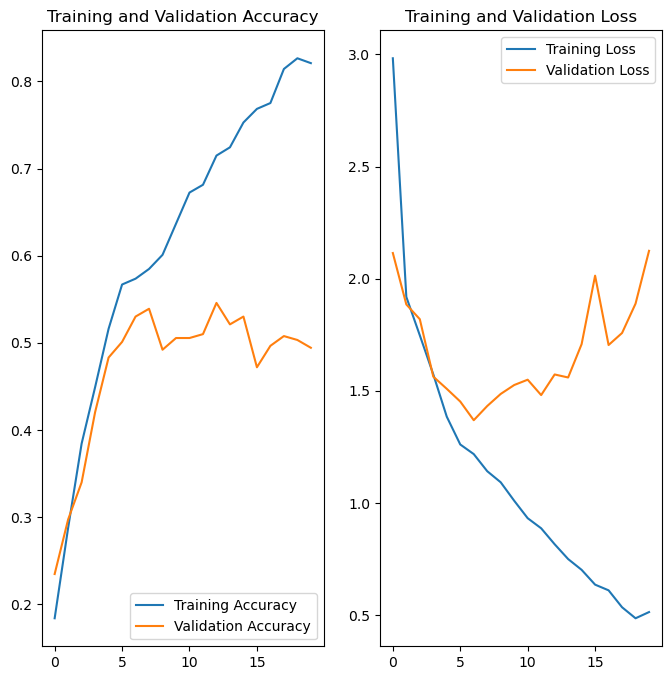

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images),axis=1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

1/1 [==============================] - 0s 207ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         5
      basal cell carcinoma       0.50      0.33      0.40         6
            dermatofibroma       0.00      0.00      0.00         3
                  melanoma       0.29      0.33      0.31         6
                     nevus       0.18      0.67      0.29         3
pigmented benign keratosis       0.29      0.67      0.40         3
      seborrheic keratosis       0.00      0.00      0.00         2
   squamous cell carcinoma       0.00      0.00      0.00         3
           vascular lesion       1.00      1.00      1.00         1

                  accuracy                           0.28        32
                 macro avg       0.25      0.33      0.27        32
              weighted avg       0.22      0.28      0.23        32

********************
Accuracy on test dataset :  0.28125


In [20]:
# lets try the same model with more epochs and different opitmizer

num_classes = 9

model_rmsprop = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_rmsprop.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history_rmsprop = model_rmsprop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 70s 1s/step - loss: 3.9939 - accuracy: 0.2349 - val_loss: 2.1025 - val_accuracy: 0.3423
Epoch 2/30
56/56 [==============================] - 73s 1s/step - loss: 1.9563 - accuracy: 0.2863 - val_loss: 1.8387 - val_accuracy: 0.3714
Epoch 3/30
56/56 [==============================] - 72s 1s/step - loss: 1.8658 - accuracy: 0.3404 - val_loss: 1.7510 - val_accuracy: 0.3960
Epoch 4/30
56/56 [==============================] - 75s 1s/step - loss: 1.6940 - accuracy: 0.3912 - val_loss: 1.5750 - val_accuracy: 0.5257
Epoch 5/30
56/56 [==============================] - 78s 1s/step - loss: 1.5873 - accuracy: 0.4503 - val_loss: 1.5905 - val_accuracy: 0.4116
Epoch 6/30
56/56 [==============================] - 82s 1s/step - loss: 1.5056 - accuracy: 0.4805 - val_loss: 1.5487 - val_accuracy: 0.4564
Epoch 7/30
56/56 [==============================] - 75s 1s/step - loss: 1.4361 - accuracy: 0.4950 - val_loss: 1.6022 - val_accuracy: 0.4541
Epoch 8/30
56/56 [==

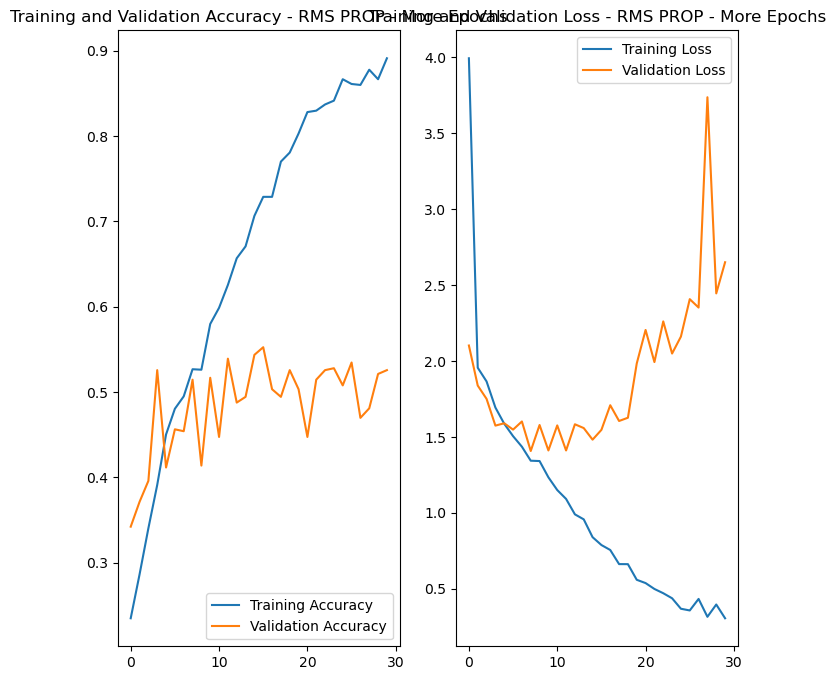

In [21]:
#visualizing results for different model

acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - RMS PROP - More Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - RMS PROP - More Epochs')
plt.show()

In [22]:
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model_rmsprop.predict(images),axis=1)
  # break
print(classification_report(y_true,y_pred,target_names=class_names))
print("*"*20)
print("RMS prop Accuracy on test dataset : ",accuracy_score(y_true,y_pred))

1/1 [==============================] - 0s 286ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         5
      basal cell carcinoma       0.00      0.00      0.00         3
            dermatofibroma       1.00      0.33      0.50         3
                  melanoma       0.11      0.20      0.14         5
                     nevus       0.14      0.50      0.22         4
pigmented benign keratosis       0.50      0.50      0.50         4
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         4
           vascular lesion       1.00      0.67      0.80         3

                  accuracy                           0.25        32
                 macro avg       0.31      0.24      0.24        32
              weighted avg       0.29      0.25      0.23        32

********************
RMS prop Accuracy on test dataset :  0.

In [23]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip

# Todo, after you have analysed the model fit history for presence of underfit or overfit, 
# choose an appropriate data augumentation strategy. 

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

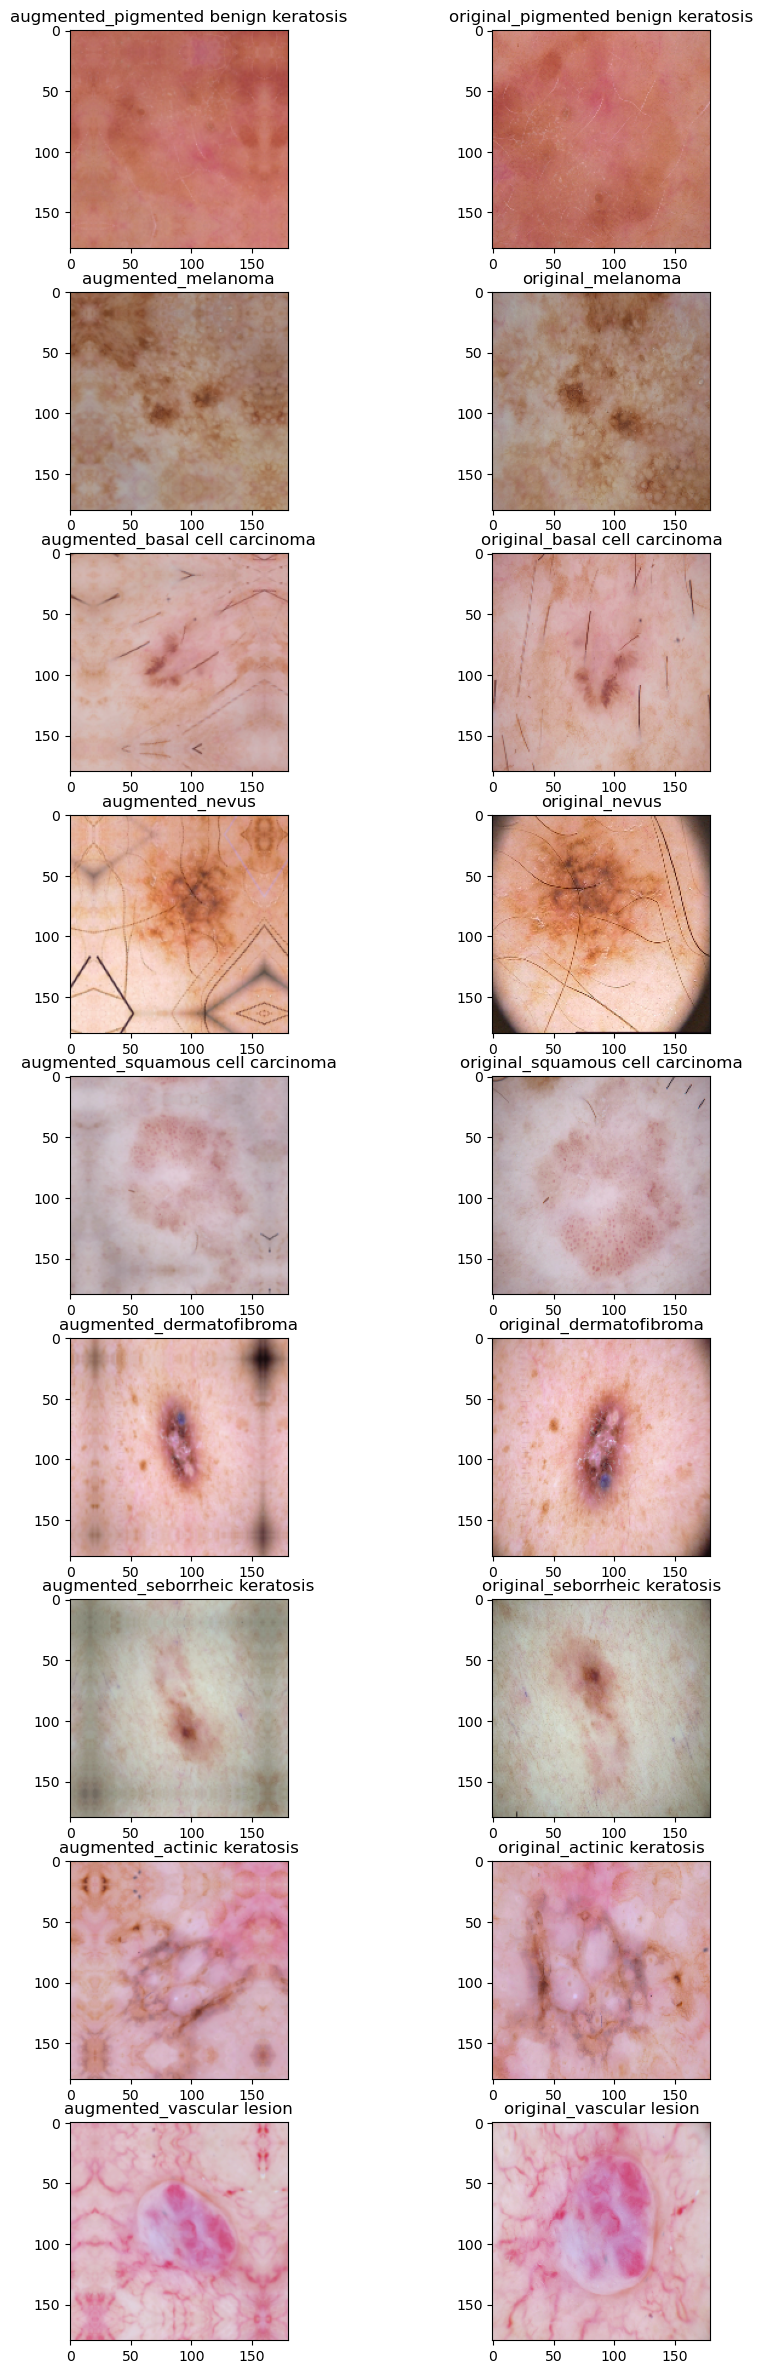

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plot_idx=0
visited={}
visited_all=False
plt.figure(figsize=(10,30))
for images, labels in train_ds.take(50):
  if not visited_all:
    for i in range(9):
    # print(images," | ",labels)
      # print(images.shape)
      # print(images[0].shape)
      # plt.figure(figsize=(20,20))
      if len(visited.keys())==9:
        visited_all=True
        break
      if class_names[labels[i]] in visited.keys():
        continue
      else:
        plt.subplot(9,2,plot_idx+1)
        x=data_aug(images)
        plt.imshow(x[i].numpy().astype("uint8"));
        # plt.imshow(images[i].numpy().astype("uint8"));
        plt.title("augmented_"+class_names[labels[i]])
        plot_idx+=1
        plt.subplot(9,2,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("original_"+class_names[labels[i]])
        visited[class_names[labels[i]]]="Y"
        plot_idx+=1
        
  else:
    break


# Do all the possible playing with Hyperparameters to get the best model. See if you can get a model which
# is not overfitting or underfitting
# Write down proper insights about your model

In [25]:
##Create the model, compile and train the model
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

# https://datascience.stackexchange.com/questions/73093/what-does-from-logits-true-do-in-sparsecategoricalcrossentropy-loss-function
# https://stackoverflow.com/questions/57253841/from-logits-true-and-from-logits-false-get-different-training-result-for-tf-loss
# https://keras.io/api/optimizers/
### Todo, choose an appropirate optimiser and loss function

In [26]:
##Compiling the model
## Your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        36928     
                                                      

In [27]:
##Training the model

## Your code goes here, note: train your model for 20 epochs
# history = ## your training code

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 78s 1s/step - loss: 3.2308 - accuracy: 0.1585 - val_loss: 2.1089 - val_accuracy: 0.1790
Epoch 2/20
56/56 [==============================] - 75s 1s/step - loss: 2.0400 - accuracy: 0.2031 - val_loss: 2.0366 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 76s 1s/step - loss: 2.0249 - accuracy: 0.2193 - val_loss: 2.0404 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 80s 1s/step - loss: 1.9856 - accuracy: 0.2400 - val_loss: 1.8879 - val_accuracy: 0.2796
Epoch 5/20
56/56 [==============================] - 79s 1s/step - loss: 1.9247 - accuracy: 0.2885 - val_loss: 1.9221 - val_accuracy: 0.2774
Epoch 6/20
56/56 [==============================] - 79s 1s/step - loss: 1.7817 - accuracy: 0.3560 - val_loss: 1.7620 - val_accuracy: 0.3490
Epoch 7/20
56/56 [==============================] - 78s 1s/step - loss: 1.6570 - accuracy: 0.4185 - val_loss: 1.7001 - val_accuracy: 0.3736
Epoch 8/20
56/56 [==

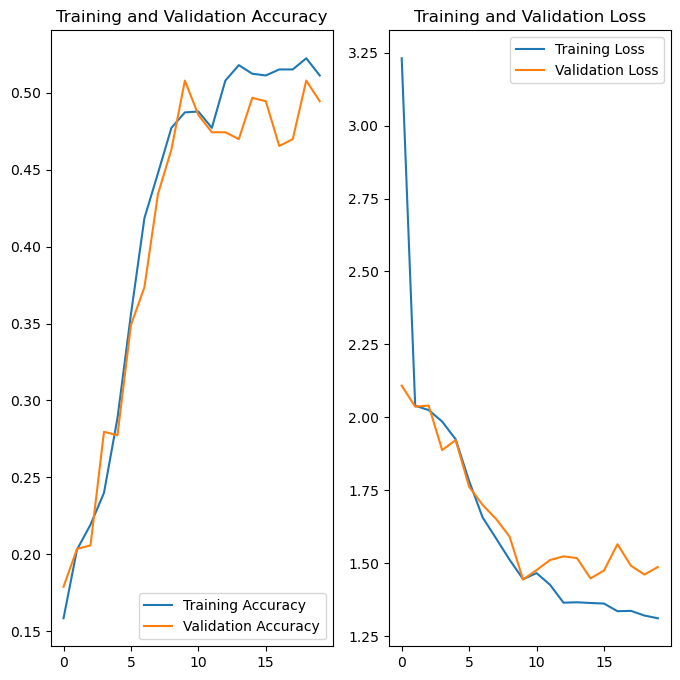

In [28]:
## Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
# try with different optimizer
model_aug_adagrad = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_adagrad = model_aug_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 78s 1s/step - loss: 2.0632 - accuracy: 0.1942 - val_loss: 2.0498 - val_accuracy: 0.1969
Epoch 2/25
56/56 [==============================] - 75s 1s/step - loss: 2.0273 - accuracy: 0.2243 - val_loss: 2.0301 - val_accuracy: 0.2125
Epoch 3/25
56/56 [==============================] - 81s 1s/step - loss: 2.0000 - accuracy: 0.2411 - val_loss: 2.0318 - val_accuracy: 0.1902
Epoch 4/25
56/56 [==============================] - 83s 1s/step - loss: 1.9903 - accuracy: 0.2578 - val_loss: 1.9979 - val_accuracy: 0.3087
Epoch 5/25
56/56 [==============================] - 79s 1s/step - loss: 1.9760 - accuracy: 0.2656 - val_loss: 2.0035 - val_accuracy: 0.2416
Epoch 6/25
56/56 [==============================] - 77s 1s/step - loss: 1.9484 - accuracy: 0.2907 - val_loss: 2.0060 - val_accuracy: 0.2550
Epoch 7/25
56/56 [==============================] - 76s 1s/step - loss: 1.9224 - accuracy: 0.2958 - val_loss: 1.9306 - val_accuracy: 0.3110
Epoch 8/25
56/56 [==

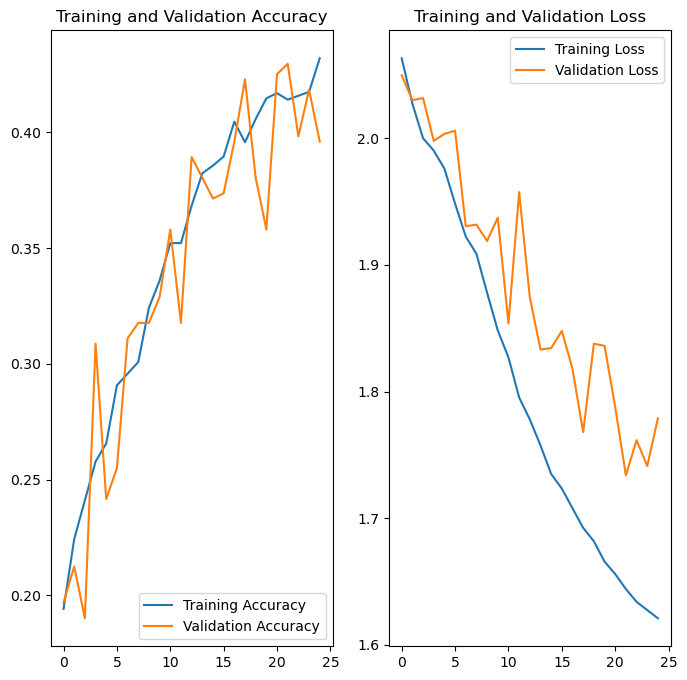

In [30]:
# creating a performance visualisation for adagrad optimiser
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
# creating another model with SGD opitmizer
model_aug_sgd = Sequential([
                    data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_aug_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_sgd = model_aug_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 74s 1s/step - loss: 2.0425 - accuracy: 0.2087 - val_loss: 2.0771 - val_accuracy: 0.1946
Epoch 2/25
56/56 [==============================] - 74s 1s/step - loss: 2.0040 - accuracy: 0.2394 - val_loss: 2.0074 - val_accuracy: 0.3110
Epoch 3/25
56/56 [==============================] - 72s 1s/step - loss: 1.9716 - accuracy: 0.2751 - val_loss: 2.1082 - val_accuracy: 0.1655
Epoch 4/25
56/56 [==============================] - 71s 1s/step - loss: 1.9604 - accuracy: 0.2807 - val_loss: 1.9264 - val_accuracy: 0.3020
Epoch 5/25
56/56 [==============================] - 72s 1s/step - loss: 1.9257 - accuracy: 0.2824 - val_loss: 1.8706 - val_accuracy: 0.2841
Epoch 6/25
56/56 [==============================] - 72s 1s/step - loss: 1.8840 - accuracy: 0.3186 - val_loss: 1.8281 - val_accuracy: 0.2931
Epoch 7/25
56/56 [==============================] - 71s 1s/step - loss: 1.8471 - accuracy: 0.3343 - val_loss: 2.0061 - val_accuracy: 0.2998
Epoch 8/25
56/56 [==

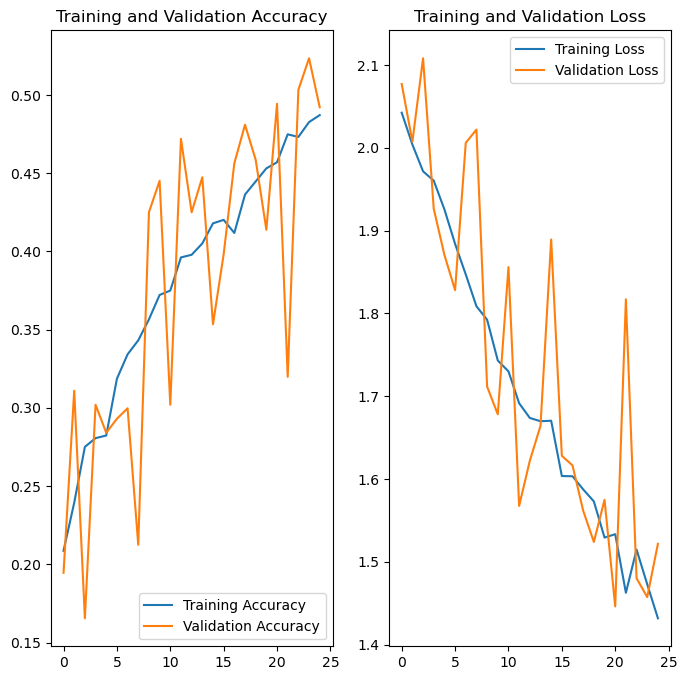

In [32]:
# creating performance visualisation for sgd optimizer
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=np.argmax(model.predict(images),axis=1)    
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=np.argmax(model_aug_adagrad.predict(images), axis=1)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=np.argmax(model_aug_sgd.predict(images), axis=1)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

1/1 [==============================] - 0s 196ms/step
Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       0.50      0.12      0.20         8
      basal cell carcinoma       0.29      1.00      0.44         2
            dermatofibroma       0.00      0.00      0.00         3
                  melanoma       0.00      0.00      0.00         3
                     nevus       0.38      1.00      0.55         3
pigmented benign keratosis       0.23      0.60      0.33         5
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         6
           vascular lesion       0.00      0.00      0.00         1

                  accuracy                           0.28        32
                 macro avg       0.15      0.30      0.17        32
              weighted avg       0.21      0.28      0.18        32

Accuracy on test dataset :  0.28125
*********

In [ ]:
##Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. 
## Do you think there is some improvement now as compared to the previous model run?
## >> Augmentation helped us reduce overfitting

##Todo: Find the distribution of classes in the training dataset.


##Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples
## compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [68]:
df=pd.DataFrame({"cancer_type":[str(x).split("/") for x in train_path_list]})

In [51]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


In [62]:
path_to_training_dataset= r"C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B6A06F4390>: 100%|██████████| 500/500 [00:03<00:00, 139.82 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B69FFB8610>: 100%|██████████| 500/500 [00:03<00:00, 135.52 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B6A003DE10>: 100%|██████████| 500/500 [00:03<00:00, 144.38 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2B6BC708710>: 100%|██████████| 500/500 [00:20<00:00, 23.99 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B6C89A4610>: 100%|██████████| 500/500 [00:20<00:00, 24.86 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2B6C90F0590>: 100%|██████████| 500/500 [00:04<00:00, 110.14 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2B6C8E29890>: 100%|██████████| 500/500 [00:10<00:00, 47.19 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B69FCF9510>: 100%|██████████| 500/500 [00:04<00:00, 112.84 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2B6C8E154D0>: 100%|██████████| 500/500 [00:04<00:00, 111.08 Samples/s]                  


In [63]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [64]:

from glob import glob

In [69]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2) 


#created 500 samples for each
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [70]:
#new counts
new_list=list(df['cancer_type'].values)
new_list.extend(list(df2['Label'].values))
len(new_list)
final_df=pd.DataFrame({"cancer_type":new_list})
final_df['cancer_type'].value_counts()

vascular lesion                                                                                                                                                 500
squamous cell carcinoma                                                                                                                                         500
seborrheic keratosis                                                                                                                                            500
pigmented benign keratosis                                                                                                                                      500
nevus                                                                                                                                                           500
                                                                                                                                                               ... 
[C:\Users\infin\

In [71]:
## Todo: Train the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [73]:
## Todo: Create a training dataset
data_dir_train=r"C:\\Users\infin\OneDrive\Desktop\NN assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [74]:
## Todo: Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [75]:
## Todo: Create your model (make sure to include normalization)

## your code goes here
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.40),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

In [76]:
## Todo: Compile your model (Choose optimizer and loss function appropriately)

## your code goes here
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 90, 90, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                

In [77]:
## Todo: Train your model

epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 223s 1s/step - loss: 2.6028 - accuracy: 0.1450 - val_loss: 2.0729 - val_accuracy: 0.2146
Epoch 2/50
169/169 [==============================] - 218s 1s/step - loss: 1.7071 - accuracy: 0.3505 - val_loss: 1.5800 - val_accuracy: 0.4217
Epoch 3/50
169/169 [==============================] - 221s 1s/step - loss: 1.4738 - accuracy: 0.4534 - val_loss: 1.3625 - val_accuracy: 0.4974
Epoch 4/50
169/169 [==============================] - 227s 1s/step - loss: 1.2571 - accuracy: 0.5408 - val_loss: 1.2836 - val_accuracy: 0.5390
Epoch 5/50
169/169 [==============================] - 229s 1s/step - loss: 1.1315 - accuracy: 0.5762 - val_loss: 1.2710 - val_accuracy: 0.5538
Epoch 6/50
169/169 [==============================] - 230s 1s/step - loss: 1.0305 - accuracy: 0.6189 - val_loss: 1.2196 - val_accuracy: 0.5501
Epoch 7/50
169/169 [==============================] - 227s 1s/step - loss: 0.9422 - accuracy: 0.6511 - val_loss: 1.0717 - val_accuracy: 0.6169

KeyboardInterrupt: 

In [ ]:
## Todo: Visualize the model results

# plot for ADaM optimizer
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#trying with a different model optimizer 
model_imbalance_sgd = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_imbalance_sgd.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
## Your code goes here, use 50 epochs.
history_imbalance_sgd = model_imbalance_sgd.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
# plot for SGD optimizer
acc = history_imbalance_sgd.history['accuracy']
val_acc = history_imbalance_sgd.history['val_accuracy']

loss = history_imbalance_sgd.history['loss']
val_loss = history_imbalance_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#trying with a different model 
model_imbalance_adagrad = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                    #first conv 2d layer
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= 'relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'),
                    #maxpooling layer
                    MaxPool2D(pool_size = (2, 2)),
                    #droput regularisation
                    Dropout(0.25),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(len(class_names))
])

model_imbalance_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
## Your code goes here, use 50 epochs.
history_imbalance_adagrad = model_imbalance_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
#visualizing for adagrad
acc = history_imbalance_adagrad.history['accuracy']
val_acc = history_imbalance_adagrad.history['val_accuracy']

loss = history_imbalance_adagrad.history['loss']
val_loss = history_imbalance_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  y_pred=model.predict_classes(images)
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_imbalance_adagrad.predict_classes(images)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)
  y_pred=model_imbalance_sgd.predict_classes(images)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=class_names))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

In [ ]:
# We tried different models with optimizers (sgd, adams, adagrad) and epochs (30,50,30) . 
#By adding augmented images which inturn helped in handling class imbalance , we mitigated/addressed the problem of overfitting 
#Out of all the models the performance was decent for the model with Adam's optimizer . 
#The model had a train accuracy of ~90% while the validation accuracy was about ~80% . 
#This model learns rapidly (increase in training and validation accuracy)for the first 20 epochs , but after this the learning becomes slow .
